<a href="https://colab.research.google.com/github/Kondasagar/Sentiment-Analysis-on-Corona-Tweets/blob/main/Coronavirus_Tweet_Sentiment_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

In [1]:
# importing required libraries for our analysis

# linear algebra module
import numpy as np     

# EDA package
import pandas as pd

# visualization package
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime as dt

import warnings
warnings.filterwarnings('ignore')

# Mounting google drive:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data loading:

In [3]:
# reading corona virus tweets dtaset
corona_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/almabetter/Capstone Projects/Coronavirus Tweet Sentiment Capstone_3/Coronavirus Tweets.csv',encoding='latin-1')

# Understanding the data:

In [4]:
# first five rows of data set
corona_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [5]:
# last five rows
corona_df.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


In [6]:
# information of features in corona_df
corona_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


**Inference: Some instances in Location feature have null values.**

In [7]:
# summary of numerical features datset
corona_df.describe()

,UserName,ScreenName
count,41157.000000,41157.000000
mean,24377.000000,69329.000000
std,11881.146851,11881.146851
min,3799.000000,48751.000000
25%,14088.000000,59040.000000
50%,24377.000000,69329.000000
75%,34666.000000,79618.000000
max,44955.000000,89907.000000


In [8]:
# Source/ Value Count/Distribution of the UserName
corona_df['UserName'].value_counts()

3799     1
31291    1
31233    1
31234    1
31235    1
        ..
17519    1
17520    1
17521    1
17522    1
44955    1
Name: UserName, Length: 41157, dtype: int64

In [9]:
# duplicate rows in corona_df ?
corona_df.duplicated().sum()


0

* **No duplicate rows in our dataset**

In [10]:
# value counts of sentiment
corona_df['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

Text(0, 0.5, 'Count')

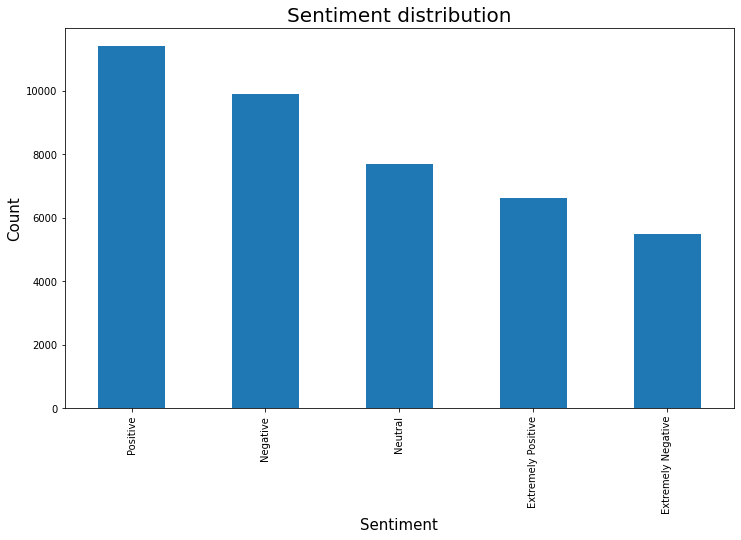

In [11]:
# bar plot for sentiment feature
plt.figure(figsize=(12,7))
corona_df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment distribution',fontsize=20)
plt.xlabel('Sentiment',fontsize=15)
plt.ylabel('Count',fontsize=15)


# Text Analysis of tweet:

In [12]:
!pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 114 kB 7.8 MB/s 


In [13]:
# Load Text Cleaning Package
import neattext.functions as nfx

In [14]:
corona_df['OriginalTweet'].iloc[3]

"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j"

# Noise Removal:

* remove mentions/userhandles

* remove hashtags

* remove urls

* remove emojis

* remove special char

In [15]:
# checking for hashtags in tweets
corona_df['OriginalTweet'].apply(nfx.extract_hashtags)

0                                                       []
1                                                       []
2                                                       []
3        [#COVID19france, #COVID_19, #COVID19, #coronav...
4        [#COVID19, #coronavirus, #CoronavirusFrance, #...
                               ...                        
41152                                     [#NZ, #COVID-19]
41153                                                   []
41154                         [#coronavirus, #toiletpaper]
41155               [#coronavirus, #COVID19, #coronavirus]
41156                                                   []
Name: OriginalTweet, Length: 41157, dtype: object

In [16]:
# Cleaning Text
corona_df['clean_tweet'] = corona_df['OriginalTweet'].apply(nfx.remove_hashtags)

In [17]:
corona_df[['OriginalTweet','clean_tweet']]

,OriginalTweet,clean_tweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1,advice Talk to your neighbours family to excha...,advice Talk to your neighbours family to excha...
2,Coronavirus Australia: Woolworths to give elde...,Coronavirus Australia: Woolworths to give elde...
3,My food stock is not the only one which is emp...,My food stock is not the only one which is emp...
4,"Me, ready to go at supermarket during the #COV...","Me, ready to go at supermarket during the ou..."
...,...,...
41152,Airline pilots offering to stock supermarket s...,Airline pilots offering to stock supermarket s...
41153,Response to complaint not provided citing COVI...,Response to complaint not provided citing COVI...
41154,You know itÂs getting tough when @KameronWild...,You know itÂs getting tough when @KameronWild...
41155,Is it wrong that the smell of hand sanitizer i...,Is it wrong that the smell of hand sanitizer i...


# Observation:
* You can see '@' symbols in tweets.
* We are gonna remove user handles

In [18]:
# Cleaning the Tweet
corona_df['clean_tweet'] = corona_df['clean_tweet'].apply(lambda x: nfx.remove_userhandles(x))

In [19]:
corona_df[['OriginalTweet','clean_tweet']]

,OriginalTweet,clean_tweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,https://t.co/iFz9FAn2Pa and https://t.co...
1,advice Talk to your neighbours family to excha...,advice Talk to your neighbours family to excha...
2,Coronavirus Australia: Woolworths to give elde...,Coronavirus Australia: Woolworths to give elde...
3,My food stock is not the only one which is emp...,My food stock is not the only one which is emp...
4,"Me, ready to go at supermarket during the #COV...","Me, ready to go at supermarket during the ou..."
...,...,...
41152,Airline pilots offering to stock supermarket s...,Airline pilots offering to stock supermarket s...
41153,Response to complaint not provided citing COVI...,Response to complaint not provided citing COVI...
41154,You know itÂs getting tough when @KameronWild...,You know itÂs getting tough when is ration...
41155,Is it wrong that the smell of hand sanitizer i...,Is it wrong that the smell of hand sanitizer i...


# Observation:
* Still we can see url text in clean tweet.
* let's remove url's too.

In [20]:
# Cleaning Text: Multiple WhiteSpaces
corona_df['clean_tweet'] = corona_df['clean_tweet'].apply(nfx.remove_multiple_spaces)

In [21]:
# Cleaning Text : Remove urls
corona_df['clean_tweet'] = corona_df['clean_tweet'].apply(nfx.remove_urls)

In [22]:
# Cleaning Text: Punctuations
corona_df['clean_tweet'] = corona_df['clean_tweet'].apply(nfx.remove_puncts)

In [23]:
corona_df[['OriginalTweet','clean_tweet']]

,OriginalTweet,clean_tweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,and and
1,advice Talk to your neighbours family to excha...,advice Talk to your neighbours family to excha...
2,Coronavirus Australia: Woolworths to give elde...,Coronavirus Australia: Woolworths to give elde...
3,My food stock is not the only one which is emp...,My food stock is not the only one which is emp...
4,"Me, ready to go at supermarket during the #COV...",Me ready to go at supermarket during the outbr...
...,...,...
41152,Airline pilots offering to stock supermarket s...,Airline pilots offering to stock supermarket s...
41153,Response to complaint not provided citing COVI...,Response to complaint not provided citing COVI...
41154,You know itÂs getting tough when @KameronWild...,You know itÂs getting tough when is rationing...
41155,Is it wrong that the smell of hand sanitizer i...,Is it wrong that the smell of hand sanitizer i...


In [24]:
# Value counts of Location in corona_df
corona_df['Location'].value_counts()

London                          540
United States                   528
London, England                 520
New York, NY                    395
Washington, DC                  373
                               ... 
Staffordshire Moorlands           1
Kithchener ON                     1
Tulsa, Ok                         1
Watford, South Oxhey, Bushey      1
i love you so much || he/him      1
Name: Location, Length: 12220, dtype: int64

In [27]:
# removing all features except clean_twee and sentiment
#  UserName     
#  ScreenName  
#  Location     
#  TweetAt 
#  OriginalTweet
corona_df.drop(['UserName','ScreenName','Location','TweetAt','OriginalTweet'],axis=1,inplace=True)

In [29]:
corona_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Sentiment    41157 non-null  object
 1   clean_tweet  41157 non-null  object
dtypes: object(2)
memory usage: 643.2+ KB


In [30]:
corona_df

,Sentiment,clean_tweet
0,Neutral,and and
1,Positive,advice Talk to your neighbours family to excha...
2,Positive,Coronavirus Australia: Woolworths to give elde...
3,Positive,My food stock is not the only one which is emp...
4,Extremely Negative,Me ready to go at supermarket during the outbr...
...,...,...
41152,Neutral,Airline pilots offering to stock supermarket s...
41153,Extremely Negative,Response to complaint not provided citing COVI...
41154,Positive,You know itÂs getting tough when is rationing...
41155,Neutral,Is it wrong that the smell of hand sanitizer i...
